In [1]:
import fc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

(-1, 2)


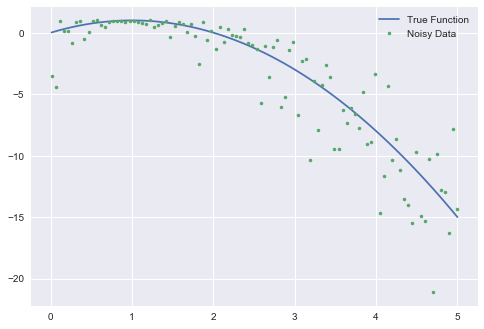

In [2]:
def model(x, a, b):
    return a * x**2 + b *x

def err_model(x, a, b):
    x_ = x + np.random.normal(0, 0.5, x.size)
    return a * x_**2 + b * x_ 

def sigma(x, a, b):
    return (2 * a * x + b) * 0.5

# Generate pure data
n = 100
x = np.linspace(0.01, 5, n)
true_params = (-1, 2)
print(true_params)
pure = model(x, *true_params)
data = err_model(x, *true_params)


#Plot
plt.plot(x, pure, label='True Function')
plt.plot(x, data, '.', label='Noisy Data')
plt.legend()

In [3]:
res = fc.fit(model, x, data, (-3, 1), (0, 4), sigma=sigma)
ext = (0, 4, -3, 1)

TypeError: unsupported operand type(s) for /: 'float' and 'function'

[-1.1414141414141412, 2.3838383838383841]


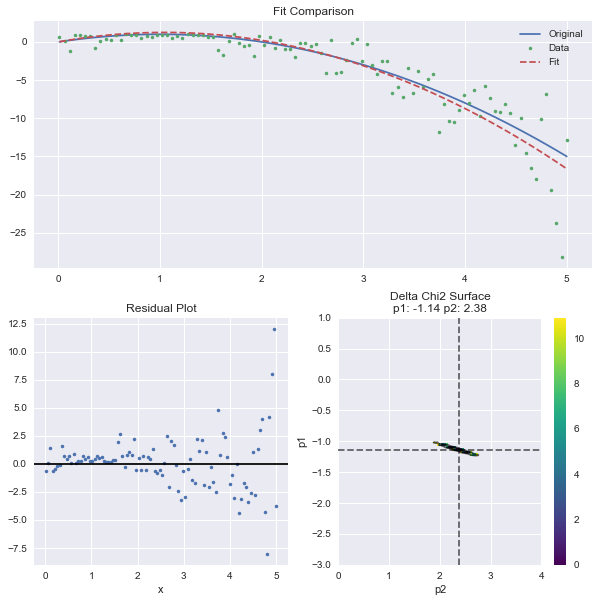

In [13]:
print(res.params)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(x, pure, label='Original')
plt.plot(x, data, '.', label='Data')
plt.plot(x, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(x, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
surf = np.ma.masked_greater(res.dchi2_space, 11.83)
im = plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.axhline(res.params[0], c='k', ls='--', alpha=0.6)
plt.axvline(res.params[1], c='k', ls='--', alpha=0.6)
plt.colorbar(im)

In [16]:
res = fc.fit(model, x, data, (-1.3, -0.95), (1.5, 3))
ext = (1.5, 3, -1.3, -0.95)

[-1.1303030303030304, 2.3333333333333335]


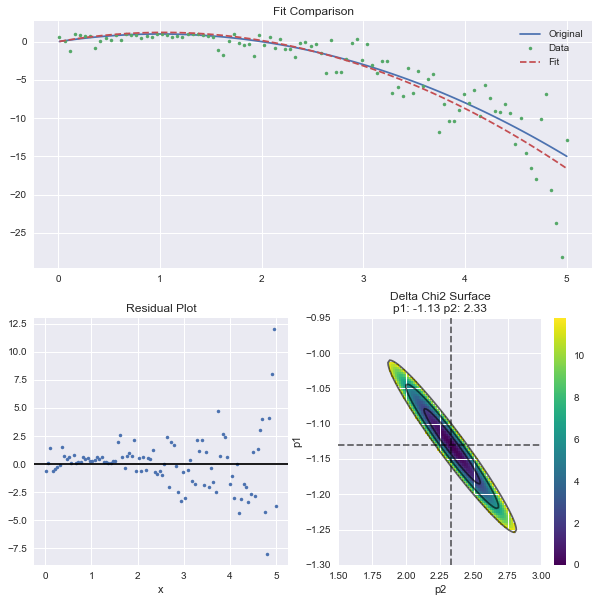

In [17]:
print(res.params)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(x, pure, label='Original')
plt.plot(x, data, '.', label='Data')
plt.plot(x, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(x, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
surf = np.ma.masked_greater(res.dchi2_space, 11.83)
im = plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.axhline(res.params[0], c='k', ls='--', alpha=0.6)
plt.axvline(res.params[1], c='k', ls='--', alpha=0.6)
plt.colorbar(im)

In [18]:
dchi2 = res.fc(n_exp=20, err_model=err_model, verbose=True)

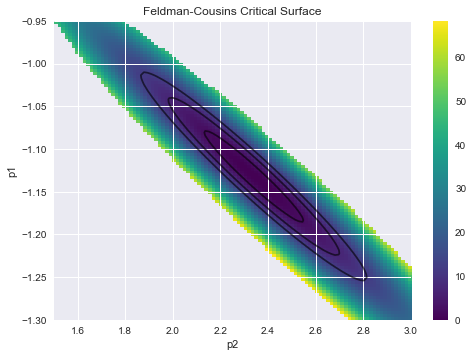

In [19]:
#mask original delta chi2 surface so that any values greater than the 95th percentile are excluded
final = res.get_surf(95)

plt.title('Feldman-Cousins Critical Surface')
im = plt.imshow(final, cmap='viridis', extent=ext, aspect='auto', origin='lower', interpolation='nearest')
plt.contour(res.dchi2_space, [0, 2.3, 6.8, 11.83], alpha=0.6, colors='k', extent=ext)
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar(im)